In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import cv2

(x_train, _), (_, _) = cifar10.load_data()

In [ ]:
image1 = x_train[np.random.randint(0, len(x_train))]
image2 = x_train[np.random.randint(0, len(x_train))]

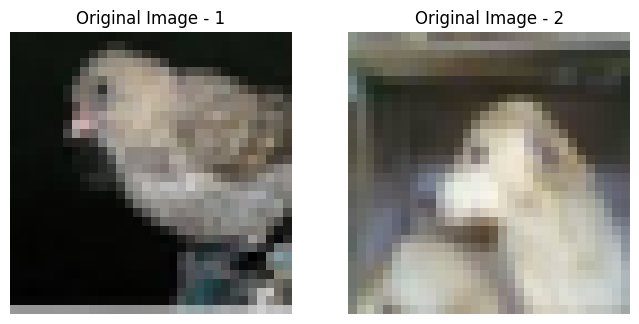

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Original Image - 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Original Image - 2')
plt.axis('off')

plt.show()

Convert to Grayscale

In [ ]:
def rgb_to_grayscale(image):
  height,width,channels = image.shape
  grayscaleImage = np.zeros((height,width))
  for x in range(height):
    for y in range(width):
        pixelValue = sum(image[x,y])/channels
        grayscaleImage[x,y] = pixelValue
  return grayscaleImage

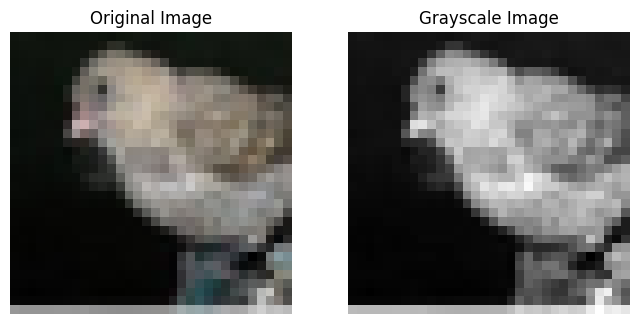

In [ ]:
grayImage1 = rgb_to_grayscale(image1)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(grayImage1,cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

Crop an Image

In [ ]:
def crop_image(image, x, y):
    height,width,_ = image.shape
    cropped_image = image[y:y+height, x:x+width]
    return cropped_image

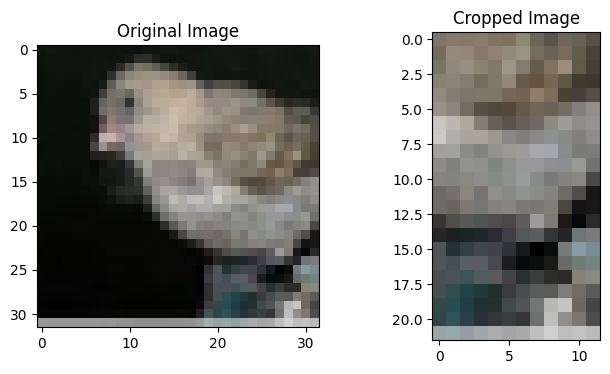

In [ ]:
croppedImage = crop_image(image1,20,10)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(croppedImage)
plt.title('Cropped Image')

plt.show()

Arithmetic Operations

In [ ]:
def addImages(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same size"
    height, width, channels = image1.shape
    addedImage = image1.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                addedImage[y, x, c] = min(int(image1[y, x, c]) + int(image2[y, x, c]), 255)
    return addedImage

def subtractImages(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same size"
    height, width, channels = image1.shape
    subtractedImage = image1.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                subtractedImage[y, x, c] = max(int(image1[y, x, c]) - int(image2[y, x, c]), 0)
    return subtractedImage

def multiplyImages(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same size"
    height, width, channels = image1.shape
    multipliedImage = image1.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                multipliedImage[y, x, c] = min(int(image1[y, x, c]) * int(image2[y, x, c]), 255)
    return multipliedImage

def divideImages(image1, image2):
    assert image1.shape == image2.shape, "Images must have the same size"
    height, width, channels = image1.shape
    dividedImage = image1.copy()
    for y in range(height):
        for x in range(width):
            for c in range(channels):
                if int(image2[y, x, c]) != 0:
                    dividedImage[y, x, c] = min(int(image1[y, x, c]) / int(image2[y, x, c]), 255)
                else:
                    dividedImage[y, x, c] = 255  # Handle division by zero
    return dividedImage

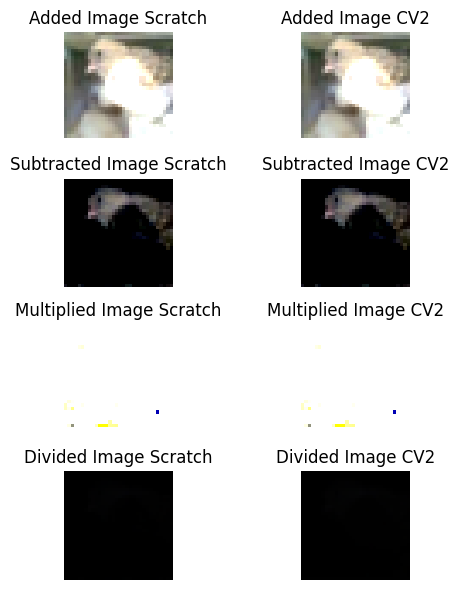

In [ ]:
addedImage = addImages(image1,image2)
subtractedImage = subtractImages(image1,image2)
multipliedImage = multiplyImages(image1,image2)
dividedImage = divideImages(image1,image2)

plt.figure(figsize=(6, 6))

plt.subplot(4, 2, 1)
plt.imshow(addedImage)
plt.title('Added Image Scratch')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(cv2.add(image1, image2))
plt.title('Added Image CV2')
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(subtractedImage)
plt.title('Subtracted Image Scratch')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(cv2.subtract(image1, image2))
plt.title('Subtracted Image CV2')
plt.axis('off')

plt.subplot(4, 2, 5)
plt.imshow(multipliedImage)
plt.title('Multiplied Image Scratch')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(cv2.multiply(image1, image2))
plt.title('Multiplied Image CV2')
plt.axis('off')

plt.subplot(4, 2, 7)
plt.imshow(dividedImage)
plt.title('Divided Image Scratch')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(cv2.divide(image1, image2))
plt.title('Divided Image CV2')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def logical_and(image1, image2):
    height, width = len(image1), len(image1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = image1[i][j] & image2[i][j]
    return result

def logical_or(image1, image2):
    height, width = len(image1), len(image1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = image1[i][j] | image2[i][j]
    return result

def logical_not(image):
    height, width = len(image), len(image[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = 255 - image[i][j]
    return result

def logical_xor(image1, image2):
    height, width = len(image1), len(image1[0])
    result = [[0 for _ in range(width)] for _ in range(height)]
    for i in range(height):
        for j in range(width):
            result[i][j] = image1[i][j] ^ image2[i][j]
    return result

In [ ]:
and_image = logical_and(image1, image2)
or_image = logical_or(image1, image2)
not_image = logical_not(image1)
xor_image = logical_xor(image1, image2)

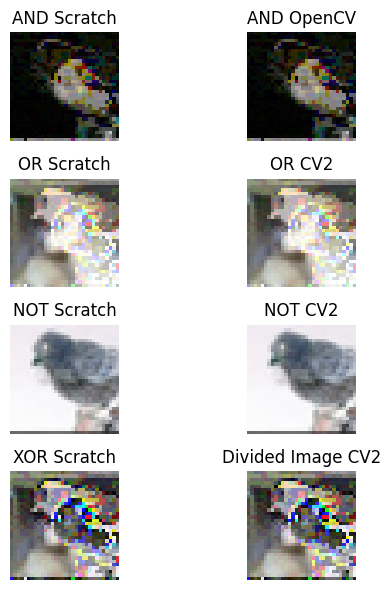

In [ ]:
plt.figure(figsize=(6, 6))

plt.subplot(4, 2, 1)
plt.imshow(and_image)
plt.title('AND Scratch')
plt.axis('off')

plt.subplot(4, 2, 2)
plt.imshow(cv2.bitwise_and(image1, image2))
plt.title('AND OpenCV')
plt.axis('off')

plt.subplot(4, 2, 3)
plt.imshow(or_image)
plt.title('OR Scratch')
plt.axis('off')

plt.subplot(4, 2, 4)
plt.imshow(cv2.bitwise_or(image1, image2))
plt.title('OR CV2')
plt.axis('off')

plt.subplot(4, 2, 5)
plt.imshow(not_image)
plt.title('NOT Scratch')
plt.axis('off')

plt.subplot(4, 2, 6)
plt.imshow(cv2.bitwise_not(image1))
plt.title('NOT CV2')
plt.axis('off')

plt.subplot(4, 2, 7)
plt.imshow(xor_image)
plt.title('XOR Scratch')
plt.axis('off')

plt.subplot(4, 2, 8)
plt.imshow(cv2.bitwise_xor(image1, image2))
plt.title('Divided Image CV2')
plt.axis('off')

plt.tight_layout()
plt.show()